# Visualisierung

Wenn du in Jupyter-Notebooks viel mit Daten arbeitest, spielt die *Darstellung der Daten* automatisch eine große Rolle. Wenn du intuitive Visualisierungen findest, wird es dir leicht fallen, den Sinn der Daten schnell zu vermitteln.

In diesem Notebook wirst du die gleichen Daten verwenden wie im letzten, nämlich die Konsumindikatoren von *Eurostat*. Im ersten Schritt lädst du die Daten herunter und benennst die Spalten um:

In [22]:
import pandas as pd
import eurostat
df = eurostat.get_data_df("ei_bsco_m")
df = df.rename(columns={"geo\\TIME_PERIOD": "country"})

Anschließend änderst du den Typ der Monatsspalten auf ein Datum:

In [23]:
from datetime import datetime
df.columns = [datetime.strptime(f.split("-")[0] + "-" + f.split("-")[1] + "-01", "%Y-%m-%d")
                if f.startswith("20") or f.startswith("19") else f for f in df.columns]

*Eurostat* verwendet viele Abkürzungen, bietet dazu aber auch Erklärungen an. Manchmal ist es besser, wenn du die Länder mit ihren echten Namen darstellst. `Germany` ersetzt du hier von Hand, weil sonst ein sehr langer Name (`Germany (until 1990 former territory of the FRG)`) verwendet wird.

In [24]:
rg = eurostat.get_dic("ei_bsco_m", 'geo')
realnames_g = { k: v for (k, v) in rg }
realnames_g['DE'] = "Germany"
realnames_g['EA19'] = "EURO"
realnames_g['EU27_2020'] = "EU"

## Zeitserien

Nun hast du alles bereit, um die erste *Zeitserie* zu visualisieren. Zeitserien werden (fast) immer als *Liniendiagramme* dargestellt. Dazu muss du `pandas` gar nicht sagen, das passiert ganz automatisch: 

<AxesSubplot:>

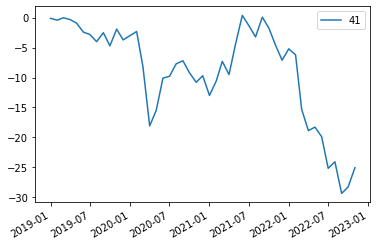

In [25]:
de_cci = df[(df["country"] == "DE") & 
            (df["indic"] == "BS-CSMCI") & 
            (df["s_adj"] == "SA")]
de_cci = de_cci[[c for c in de_cci.columns 
                   if isinstance(c, datetime) and (c.year>=2019)]]
de_cci.T.plot()

## Multi-Zeitserien

Der Konsumindikator für Deutschland ist zwar interessant, aber spannender ist es, wenn du unterschiedliche Länder vergleichen kannst. Mithilfe von `isin` kannst du unterschiedliche Optionen zulassen. Den Zeitraum wählst du jetzt ab 2000, um noch mehr Konjunkturkrisen und ihre Auswirkungen sehen zu können:

In [26]:
# Länder wählen
cci_mix = df[(df["country"].isin(["DE", "EA19", "SE"])) & 
             (df["indic"] == "BS-CSMCI") & 
             (df["s_adj"] == "SA")]

# nur bestimmte Spalte behalten und transponieren (Zeit nach unten)
cci_mix = cci_mix[[c for c in cci_mix.columns 
                     if (isinstance(c, datetime) and c.year>=2000) or c == "country"]].set_index("country").transpose()

<AxesSubplot:>

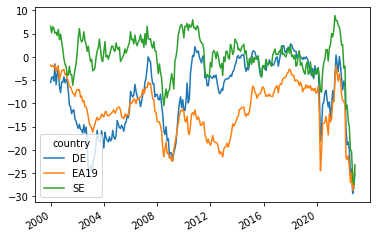

In [27]:
cci_mix.plot()

## Barplot

Liniendiagramme eignen sich sehr gut, wenn die x-Achse ein Zeit darstellt. Wenn du kategorische Informationen auf der x-Achse verwenden willst, sind *Barplots* besser geeignet.

Als Beispiel stellst du hier die Verteilung des Konsumindikators für den 1.1.2021 über die unterschiedlichen Länder dar:

<AxesSubplot:>

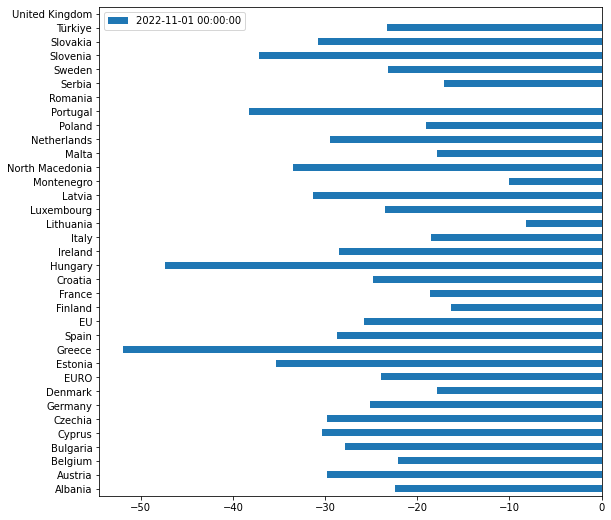

In [28]:
cci = df[(df["indic"] == "BS-CSMCI") & (df["s_adj"] == "SA")]
cci = cci[["country", datetime(2022,11,1)]].set_index("country")
# echte Namen verwenden
cci.index = [realnames_g[i] for i in cci.index]
cci.plot.barh(figsize=(9, 9))

Wenn du möchtest, kannst du die Werte auch noch absteigend sortieren:

<AxesSubplot:>

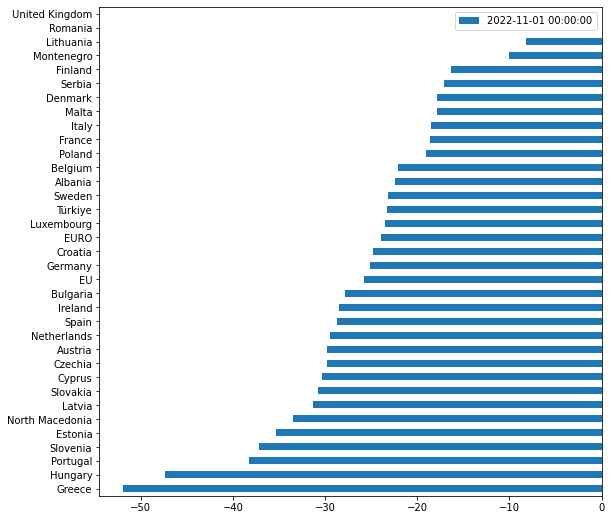

In [29]:
cci.sort_values(datetime(2022,11,1)).plot.barh(figsize=(9, 9))

## Histogramm

Wenn du dich für die Verteilung der Werte interessiert, ist das *Histogramm* ein geeignetes Instrument zur Visualisierung. Es sieht einem *Barplot* sehr ähnlich, allerdings *zählt* es immer Werte:

<AxesSubplot:ylabel='Frequency'>

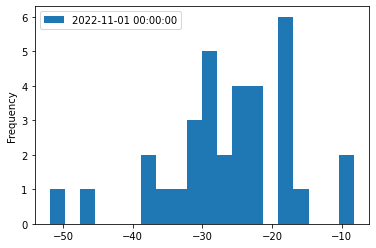

In [31]:
cci.plot.hist(bins=20)

Die Werte zwischen -20 und -20 sind also am häufigsten.

Die Schritte auf der x-Achse kannst du mit dem Parameter `bins` beeinflussen. Probier das einfach mal aus!

## Boxplots

Oft wirst du dich auch für die *Streuung der Werte* interessieren. Dafür eignen sich sog. *Boxplots*. Als Ausgangsbasis betrachtest du einen einzelnen Konsumindikator für viele Länder:

In [34]:
csmci = df[(df["indic"] == "BS-CSMCI") & (df["s_adj"] == "SA")]
csmci

,freq,indic,s_adj,unit,country,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,1980-04-01 00:00:00,1980-05-01 00:00:00,...,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00
35,M,BS-CSMCI,SA,BAL,AL,NaN,NaN,NaN,NaN,NaN,...,-15.6,-24.9,-26.0,-23.2,-22.2,-22.1,-19.6,-22.2,-23.3,-22.4
36,M,BS-CSMCI,SA,BAL,AT,NaN,NaN,NaN,NaN,NaN,...,-7.8,-22.3,-21.2,-24.1,-24.2,-33.2,-31.1,-32.3,-31.0,-29.8
37,M,BS-CSMCI,SA,BAL,BE,NaN,NaN,NaN,NaN,NaN,...,-10.1,-21.6,-18.5,-19.1,-18.9,-20.3,-19.5,-27.9,-26.6,-22.1
38,M,BS-CSMCI,SA,BAL,BG,NaN,NaN,NaN,NaN,NaN,...,-20.6,-29.7,-29.2,-32.2,-29.4,-26.9,-28.2,-30.6,-28.1,-27.8
39,M,BS-CSMCI,SA,BAL,CY,NaN,NaN,NaN,NaN,NaN,...,-19.4,-32.9,-32.9,-35.4,-35.1,-35.3,-35.9,-27.7,-32.7,-30.3
40,M,BS-CSMCI,SA,BAL,CZ,NaN,NaN,NaN,NaN,NaN,...,-14.9,-28.3,-27.5,-28.7,-29.8,-32.4,-28.0,-30.5,-31.7,-29.8
41,M,BS-CSMCI,SA,BAL,DE,NaN,NaN,NaN,NaN,NaN,...,-6.2,-15.3,-18.9,-18.3,-19.9,-25.2,-24.1,-29.4,-28.3,-25.1
42,M,BS-CSMCI,SA,BAL,DK,NaN,NaN,NaN,NaN,NaN,...,0.5,-11.2,-14.7,-15.4,-17.2,-17.9,-14.7,-20.1,-23.6,-17.8
43,M,BS-CSMCI,SA,BAL,EA19,NaN,NaN,NaN,NaN,NaN,...,-9.7,-21.7,-22.1,-21.2,-23.7,-27.0,-24.9,-28.7,-27.5,-23.9
44,M,BS-CSMCI,SA,BAL,EE,NaN,NaN,NaN,NaN,NaN,...,-13.9,-16.7,-19.6,-28.7,-34.7,-35.6,-36.8,-44.2,-37.0,-35.3


Die Daten haben leider nicht das richtig Format für den Boxplot. Dazu müssen die Datensätze *untereinander* stehen. 
Du brauchst nun das Gegenteil von `pivot`, das sich in `pandas` mit der Funktion `melt` erreichen lässt. Du möchtest als Spalten `country`  (schon da) und `month` verwenden (das waren bisher individuelle Spalten). Dich interessiert nur der Wert `csmci`:

In [37]:
columns = [c for c in csmci.columns if isinstance(c, datetime) and (c.year>=2010)]

csmci_unwrapped = pd.melt(csmci[["country"] + columns].dropna(), 
                          id_vars=["country"], var_name="month", value_name="csmci")
csmci_unwrapped

,country,month,csmci
0,AT,2010-01-01,-4.6
1,BE,2010-01-01,-8.2
2,BG,2010-01-01,-30.7
3,CY,2010-01-01,-27.6
4,CZ,2010-01-01,-15.6
...,...,...,...
4335,PT,2022-11-01,-38.3
4336,SE,2022-11-01,-23.2
4337,SI,2022-11-01,-37.2
4338,SK,2022-11-01,-30.8


Diese Daten kannst du nun mithilfe von `seaborn` als Boxplot darstellen. Du erkennst den Median, Quantile, Extremwerte und Ausreißer.

<AxesSubplot:xlabel='csmci', ylabel='country'>

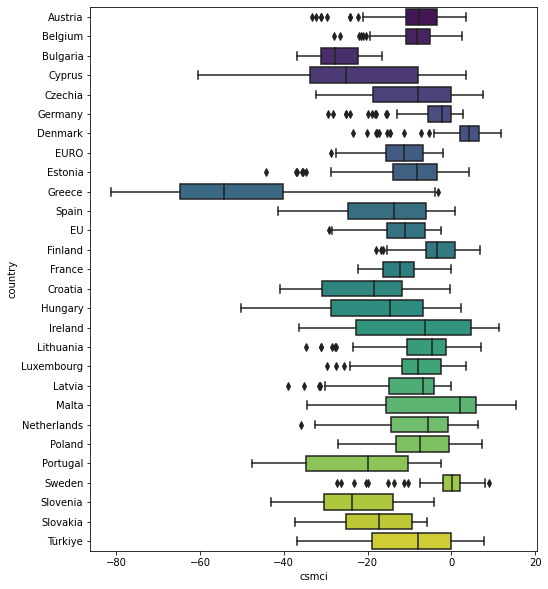

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
csmci_unwrapped["country"] = [realnames_g[i] for i in csmci_unwrapped["country"]]
plt.figure(figsize=(8, 10))
sns.boxplot(y="country", x="csmci", data=csmci_unwrapped, palette="viridis")

Eine etwas schönere Darstellung erreichst du durch die Sortierung der Länder nach den Medianen des Konsumindikators:

<AxesSubplot:xlabel='csmci', ylabel='country'>

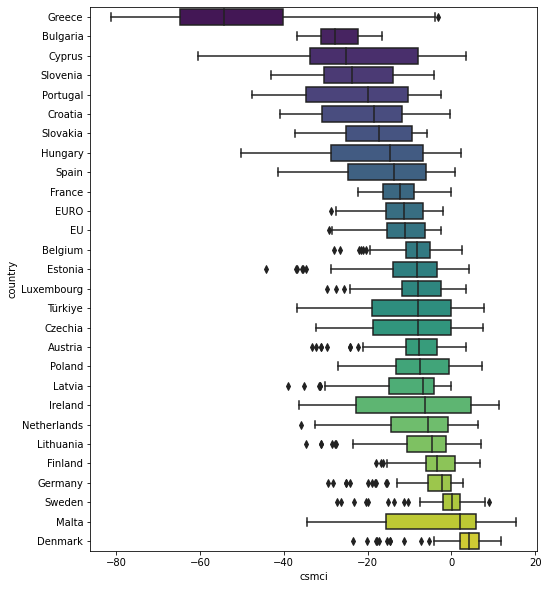

In [40]:
labels = csmci_unwrapped.groupby("country").agg({"csmci": "median"}).sort_values("csmci").index.values
plt.figure(figsize=(8, 10))
sns.boxplot(y="country", x="csmci", data=csmci_unwrapped, order=labels, palette="viridis")

## Korrelationen

Wie du in den Tabellen gesehen hast, gibt es sehr viele unterschiedliche Konsumindikatoren. In der Datenanalyse wirst du oft mit der Fragestellung konfrontiert, ob diese alle unabhängig voneinander sind. Das kann eine *Korrelationsanalyse* klären.

Dazu betrachtest du die Konsumindikatoren für Deutschland und transponierst das Ergebnis (die Zeiten sollen in den Zeilen stehen):

In [41]:
de = df[(df["s_adj"] == "SA") & (df["country"] == "DE")].set_index("indic")[columns].transpose()
de

indic,BS-CSMCI,BS-FS-LY,BS-FS-NY,BS-GES-LY,BS-GES-NY,BS-MP-NY,BS-MP-PR,BS-PT-LY,BS-PT-NY,BS-SFSH,BS-SV-NY,BS-SV-PR,BS-UE-NY
2010-01-01,-11.5,-4.6,2.0,-63.5,-27.2,-16.1,-3.3,-6.7,14.6,22.1,4.0,37.5,62.7
2010-02-01,-11.5,-4.0,2.0,-57.2,-30.5,-13.4,-7.7,-5.5,13.5,22.5,4.3,35.7,57.1
2010-03-01,-9.6,-2.8,2.4,-54.0,-23.9,-13.9,-7.1,0.6,14.8,23.3,4.6,33.9,49.8
2010-04-01,-5.6,-2.1,4.9,-43.7,-14.7,-10.5,-7.9,7.4,18.2,23.6,6.5,33.3,34.5
2010-05-01,-9.9,-3.3,3.6,-43.4,-26.4,-13.5,-8.7,7.8,24.1,21.9,3.2,29.9,34.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-25.2,-12.0,-15.5,-52.2,-48.9,-24.5,-35.5,73.6,53.0,23.3,12.6,24.5,34.5
2022-08-01,-24.1,-10.3,-14.8,-51.1,-46.3,-24.9,-35.2,76.3,52.5,25.3,15.6,33.7,31.8
2022-09-01,-29.4,-14.4,-23.0,-57.6,-53.4,-27.0,-41.2,75.4,54.4,24.2,10.8,32.4,38.3
2022-10-01,-28.3,-13.0,-19.7,-57.7,-53.0,-27.7,-39.2,75.0,50.9,20.6,11.7,32.9,39.3


Ein sog. *Scatterplot* gibt dir ein erstes Verständnis, ob und wie die Werte korreliert sein könnten:

<AxesSubplot:xlabel='BS-SFSH', ylabel='BS-CSMCI'>

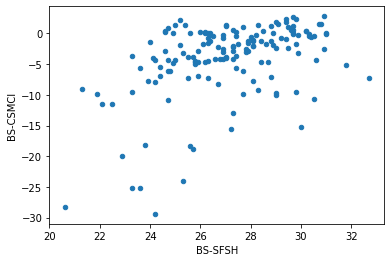

In [16]:
de.plot.scatter(x="BS-SFSH", y="BS-CSMCI")

Etwas besser kannst du das noch mit `seaborn` darstellen. Hier erhältst du noch eine Regressionsgerade und die Verteilung der Indikatoren als Histogramm:

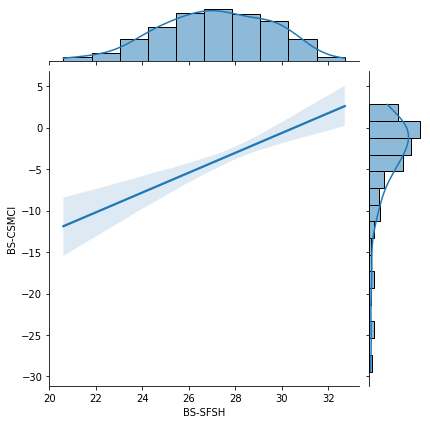

In [42]:
sns.jointplot(x=de["BS-SFSH"], y=de["BS-CSMCI"], scatter=False, kind="reg")

Wenn du die Abhängigkeit noch genauer berechnen willst, kannst du die lineare Regression durch `scipy` durchführen lassen:

In [ ]:
from scipy.stats import linregress
linregress(de["BS-SFSH"], de["BS-CSMCI"])

## Geodaten

Bisher hast du eine wesentliche Dimension der Daten noch gar nicht berücksichtigt, nämlich die Geografie. Zum Glück geht das in Python auch ziemlich einfach, es gibt eine gute Integration in `pandas`, die sich `geopandas` nennt:

In [ ]:
# pip install geopandas

Konturen für Länder findest du im sog. [GeoJSON](https://de.wikipedia.org/wiki/GeoJSON)-Format. Wir haben die GeoJSON-Daten für Europa schon mal zusammengestellt:

<AxesSubplot:>

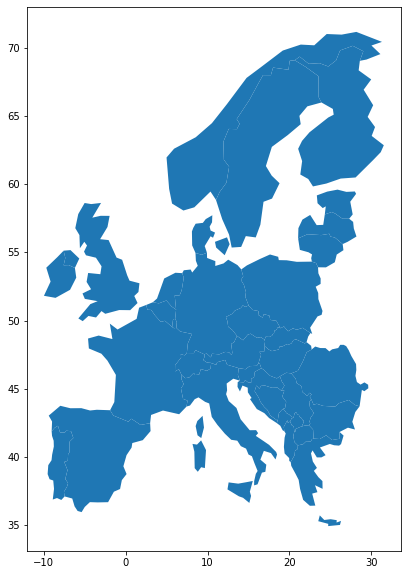

In [43]:
import geopandas
bl_geo = geopandas.read_file("europe.geo.json")
bl_geo.plot(figsize=(10,10))

Das sieht schon ganz gut aus! Zum Glück ist der `GeoDataFrame` auch eine Art `DataFrame`, so dass du ihn problemlos mittels `merge` mit dem `DataFrame` der Konsumindikatoren verbinden kannst. Da die Spalten nicht die gleichen Namen haben, musst du einmal `country` und einmal `iso_a2` angeben. Der `outer`-Join führt dazu, dass keine Länder wegfallen, die nicht zur EU gehören.


In [19]:
hm = df[(df["indic"] == "BS-CSMCI") & (df["s_adj"] == "SA")]
ghm = pd.merge(hm, bl_geo, left_on="country", right_on='iso_a2', how="outer")
ghm

,freq,indic,s_adj,unit,country,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,1980-04-01 00:00:00,1980-05-01 00:00:00,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,M,BS-CSMCI,SA,BAL,AL,NaN,NaN,NaN,NaN,NaN,...,Europe,Southern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,ALB.geojson,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
1,M,BS-CSMCI,SA,BAL,AT,NaN,NaN,NaN,NaN,NaN,...,Europe,Western Europe,Europe & Central Asia,7.0,7.0,5.0,-99.0,1.0,AUT.geojson,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
2,M,BS-CSMCI,SA,BAL,BE,NaN,NaN,NaN,NaN,NaN,...,Europe,Western Europe,Europe & Central Asia,7.0,7.0,5.0,-99.0,1.0,BEL.geojson,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."
3,M,BS-CSMCI,SA,BAL,BG,NaN,NaN,NaN,NaN,NaN,...,Europe,Eastern Europe,Europe & Central Asia,8.0,8.0,5.0,-99.0,1.0,BGR.geojson,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
4,M,BS-CSMCI,SA,BAL,CY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5,M,BS-CSMCI,SA,BAL,CZ,NaN,NaN,NaN,NaN,NaN,...,Europe,Eastern Europe,Europe & Central Asia,10.0,14.0,8.0,-99.0,1.0,CZE.geojson,"POLYGON ((16.96029 48.59698, 16.49928 48.78581..."
6,M,BS-CSMCI,SA,BAL,DE,NaN,NaN,NaN,NaN,NaN,...,Europe,Western Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,DEU.geojson,"POLYGON ((9.92191 54.98310, 9.93958 54.59664, ..."
7,M,BS-CSMCI,SA,BAL,DK,NaN,NaN,NaN,NaN,NaN,...,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,DNK.geojson,"MULTIPOLYGON (((12.69001 55.60999, 12.08999 54..."
8,M,BS-CSMCI,SA,BAL,EA19,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
9,M,BS-CSMCI,SA,BAL,EE,NaN,NaN,NaN,NaN,NaN,...,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,EST.geojson,"POLYGON ((24.31286 57.79342, 24.42893 58.38341..."


Du siehst, dass sich eine neue Spalte `geometry` ergeben hat. Um diese wieder als Geodaten plotten zu können, musst du sie nun wieder in einen `GeoDataFrame` wandeln:

<AxesSubplot:>

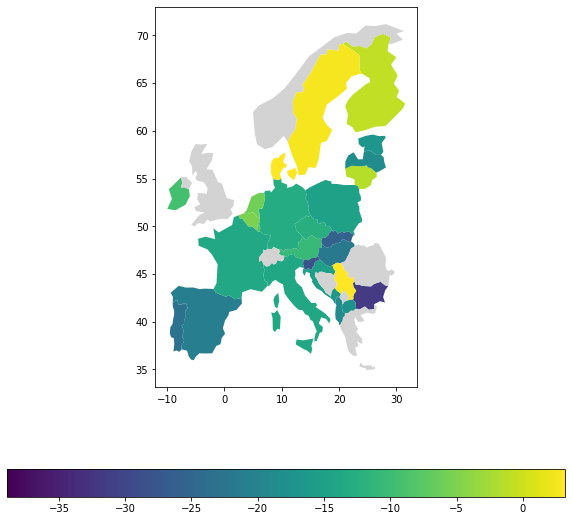

In [44]:
geopandas.GeoDataFrame(ghm).plot(column=datetime(2021, 1, 1), 
         legend=True, 
         legend_kwds={'orientation': "horizontal"}, 
         missing_kwds={
           "color": "lightgrey",
    },
         figsize=(10,10))

Das Ergebnis sieht richtig toll aus! Im Vergleich zu den bisherigen Daten kannst du auch gut das Nord-Süd-Gefälle in der EU erkennen, nur Serbien tanzt etwas aus der Reihe.